In [3]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn #nn contains all of PyTorch's building block for neural networks

In [2]:
what_we_are_covering = {
    1: "data (prepare and load",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

## Data - preparing and loading
**Get data into numerical representation.**

In [5]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

## Train/test split

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

In [30]:
def plot_predictions(train_data, train_label, test_data, test_labels, predictions=None):
    """
    Plots trainging data, test data and compares predictions.
    """
    plt.figure(figsize=(9, 6))
    
    plt.scatter(train_data, train_label, c="b", s=5, label="Traing data")

    plt.scatter(test_data, test_labels, c="r", s=5, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=5, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()

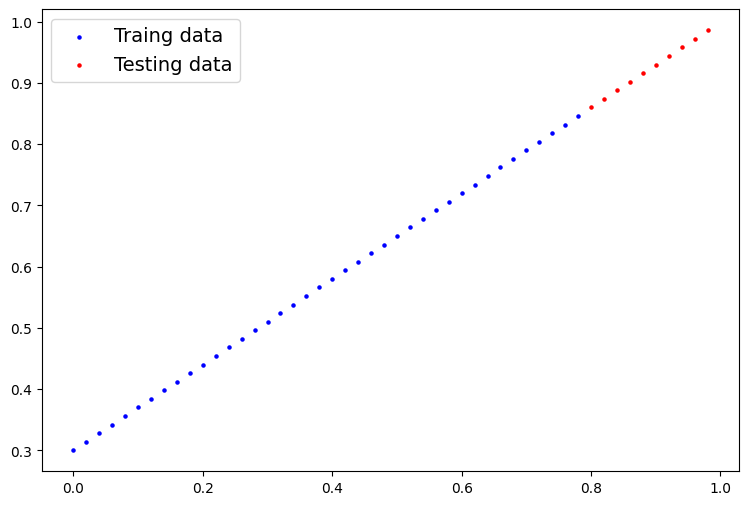

In [31]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building model

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, 
                                               requres_grad=True, 
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1, 
                                               requres_grad=True, 
                                               dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias